<a href="https://colab.research.google.com/github/jonatan-leal/deep-learning-project/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

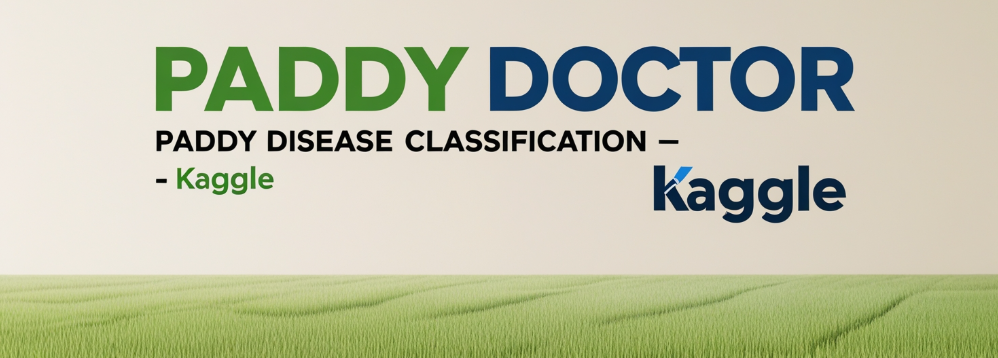

In [ ]:
!pip install kaggle
!pip install opendatasets --upgrade
import opendatasets as od

In [ ]:
dataset_link = "https://www.kaggle.com/competitions/paddy-disease-classification"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ferleysilva94
Your Kaggle Key: ··········


100%|██████████| 1.02G/1.02G [00:05<00:00, 204MB/s]



Extracting archive ./paddy-disease-classification/paddy-disease-classification.zip to ./paddy-disease-classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/paddy-disease-classification'

In [ ]:
# Carga los datos de entrenamiento
train_df = pd.read_csv(f'{path}/train.csv')

In [ ]:
train_df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


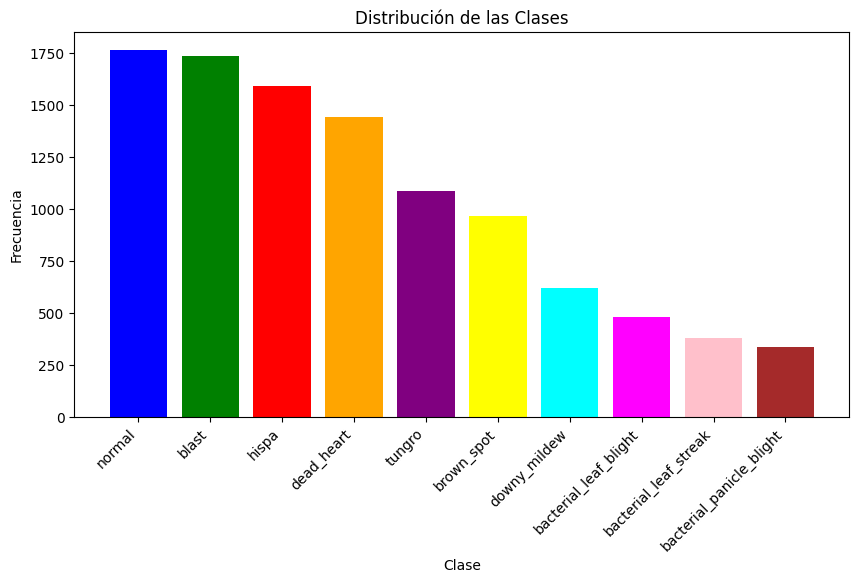

In [ ]:
class_freq = train_df.label.value_counts()

# Define una lista de colores para cada clase
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'pink', 'brown']  # Agrega más colores si es necesario

# Crea el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 5))
plt.bar(class_freq.index, class_freq.values, color=colors[:len(class_freq)])  # Usa los colores definidos

# Configura las etiquetas del gráfico (igual que antes)
plt.title('Distribución de las Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.show()

# **Preparacion de los datos a trabajar.**


1.   Creando un nuevo dataset con las clases a trabajar.
2.   Creando un nuevo directorio.

In [ ]:
import os
import shutil
import pandas as pd

# Ruta base del dataset
path = '/content/paddy-disease-classification'

# Rutas originales y destino
origen_base = f'{path}/train_images'
csv_path = f'{path}/train.csv'
destino_base = f'{path}/filtered_train_images'

# Leer el CSV
train_df = pd.read_csv(csv_path)

# Filtrar las clases deseadas
clases_interes = ['bacterial_leaf_blight', 'brown_spot', 'hispa', 'tungro', 'normal']
df_filtrado = train_df[train_df['label'].isin(clases_interes)]

# 🔴 Borrar el directorio destino si ya existe
if os.path.exists(destino_base):
    shutil.rmtree(destino_base)
os.makedirs(destino_base, exist_ok=True)

# ✅ Copiar imágenes filtradas
for _, fila in df_filtrado.iterrows():
    clase = fila['label']
    imagen = fila['image_id']

    ruta_origen = os.path.join(origen_base, clase, imagen)
    carpeta_destino = os.path.join(destino_base, clase)
    ruta_destino = os.path.join(carpeta_destino, imagen)

    os.makedirs(carpeta_destino, exist_ok=True)
    shutil.copy2(ruta_origen, ruta_destino)

# ✅ Verificación final
print("Clases copiadas en filtered_train_images:")
print(os.listdir(destino_base))


Clases copiadas en filtered_train_images:
['bacterial_leaf_blight', 'hispa', 'tungro', 'normal', 'brown_spot']


### Dividiendo la base de datos en Train y Validación.

In [ ]:
import random

# Carpeta con las imágenes filtradas (5 clases)
base_dir = '/content/paddy-disease-classification/filtered_train_images'

# Directorios para train y val
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Proporción de split (80% train, 20% val)
train_ratio = 0.8

# Si existen, eliminar carpetas train/val para partir limpio
for d in [train_dir, val_dir]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d)

# Obtener lista de clases (carpetas)
clases = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and d not in ['train','val']]

for clase in clases:
    print(f'Procesando clase: {clase}')
    clase_dir = os.path.join(base_dir, clase)
    imagenes = os.listdir(clase_dir)

    # Mezclar imágenes aleatoriamente
    random.shuffle(imagenes)

    # Calcular número de imágenes para train y val
    n_train = int(len(imagenes) * train_ratio)

    # Crear carpetas train/clase y val/clase
    os.makedirs(os.path.join(train_dir, clase), exist_ok=True)
    os.makedirs(os.path.join(val_dir, clase), exist_ok=True)

    # Copiar imágenes a train
    for img in imagenes[:n_train]:
        shutil.copy2(os.path.join(clase_dir, img), os.path.join(train_dir, clase, img))

    # Copiar imágenes a val
    for img in imagenes[n_train:]:
        shutil.copy2(os.path.join(clase_dir, img), os.path.join(val_dir, clase, img))

print('División train/val completada.')

Procesando clase: bacterial_leaf_blight
Procesando clase: hispa
Procesando clase: tungro
Procesando clase: normal
Procesando clase: brown_spot
División train/val completada.


### Función para contar el número de imágenes por cada clase luego de la partición.

In [ ]:
def contar_imagenes_por_clase(base_path):
    clases = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    conteo = {}
    for clase in clases:
        ruta_clase = os.path.join(base_path, clase)
        cantidad = len(os.listdir(ruta_clase))
        conteo[clase] = cantidad
    return conteo

# Directorios train y val
train_dir = '/content/paddy-disease-classification/filtered_train_images/train'
val_dir = '/content/paddy-disease-classification/filtered_train_images/val'

conteo_train = contar_imagenes_por_clase(train_dir)
conteo_val = contar_imagenes_por_clase(val_dir)

print("Cantidad de imágenes por clase en TRAIN:")
for clase, cant in conteo_train.items():
    print(f"{clase}: {cant}")

print("\nCantidad de imágenes por clase en VAL:")
for clase, cant in conteo_val.items():
    print(f"{clase}: {cant}")

Cantidad de imágenes por clase en TRAIN:
bacterial_leaf_blight: 383
hispa: 1275
tungro: 870
normal: 1411
brown_spot: 772

Cantidad de imágenes por clase en VAL:
bacterial_leaf_blight: 96
hispa: 319
tungro: 218
normal: 353
brown_spot: 193


## **📓 Librerias**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation

# **Crear generadores de datos**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/paddy-disease-classification/filtered_train_images/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',          # ← multiclase
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    '/content/paddy-disease-classification/filtered_train_images/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',          # ← multiclase
    shuffle=False
)


Found 4711 images belonging to 5 classes.
Found 1179 images belonging to 5 classes.


# **Definir VGG16 como base**

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar pesos

In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

## **🏢 Construir modelo**

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  #  5 clases, softmax

# **⚙️ Compilar el modelo**

In [ ]:
model.compile(
    loss='categorical_crossentropy',  #  Para multiclase
    optimizer='adam',
    metrics=['accuracy']
)

## **✅  Definir callback para guardar el mejor modelo automáticamente**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='/content/mejor_modelo_vgg16_gpu.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


# **🏋️ Entrenar el modelo**

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[checkpoint]  # ✅ Aquí se activa el guardado automático
)

Epoch 1/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6718 - loss: 1.0182
Epoch 1: val_accuracy improved from -inf to 0.87786, saving model to /content/mejor_modelo_vgg16_gpu.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 55s 330ms/step - accuracy: 0.6726 - loss: 1.0158 - val_accuracy: 0.8779 - val_loss: 0.3900
Epoch 2/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9623 - loss: 0.1228
Epoch 2: val_accuracy improved from 0.87786 to 0.92282, saving model to /content/mejor_modelo_vgg16_gpu.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 37s 250ms/step - accuracy: 0.9623 - loss: 0.1227 - val_accuracy: 0.9228 - val_loss: 0.2767
Epoch 3/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9825 - loss: 0.0522
Epoch 3: val_accuracy improved from 0.92282 to 0.93045, saving model to /content/mejor_modelo_vgg16_gpu.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - accuracy: 0.9825 - loss: 0.0523 - val_accuracy: 0.9304 - val_loss: 0.2669
Epoch 4/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9850 - loss: 0.0527
Epoch 4: val_accuracy improved from 0.93045 to 0.94148, saving model to /content/mejor_modelo_vgg16_gpu.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.9850 - loss: 0.0527 - val_accuracy: 0.9415 - val_loss: 0.2719
Epoch 5/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9898 - loss: 0.0312
Epoch 5: val_accuracy did not improve from 0.94148
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9355 - val_loss: 0.3188
Epoch 6/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9868 - loss: 0.0397
Epoch 6: val_accuracy did not improve from 0.94148
148/148 ━━━━━━━━━━━━━━━━━━━━ 35s 237ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9321 - val_loss: 0.3363
Epoch 7/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9815 - loss: 0.0493
Epoch 7: val_accuracy did not improve from 0.94148
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 208ms/step - accuracy: 0.9815 - loss: 0.0494 - val_accuracy: 0.9186 - val_loss: 0.5276
Epoch 8/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9744 - loss: 0.0826
Epoch 8: val_ac

148/148 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - accuracy: 0.9887 - loss: 0.0379 - val_accuracy: 0.9440 - val_loss: 0.3037
Epoch 12/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9909 - loss: 0.0301
Epoch 12: val_accuracy did not improve from 0.94402
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 210ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9313 - val_loss: 0.3453
Epoch 13/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9868 - loss: 0.0377
Epoch 13: val_accuracy did not improve from 0.94402
148/148 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9423 - val_loss: 0.3565
Epoch 14/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9973 - loss: 0.0133
Epoch 14: val_accuracy improved from 0.94402 to 0.94656, saving model to /content/mejor_modelo_vgg16_gpu.h5


148/148 ━━━━━━━━━━━━━━━━━━━━ 37s 251ms/step - accuracy: 0.9973 - loss: 0.0133 - val_accuracy: 0.9466 - val_loss: 0.3178
Epoch 15/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9960 - loss: 0.0127
Epoch 15: val_accuracy did not improve from 0.94656
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 210ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9347 - val_loss: 0.3175


# **📈  Visualizar curvas de entrenamiento**

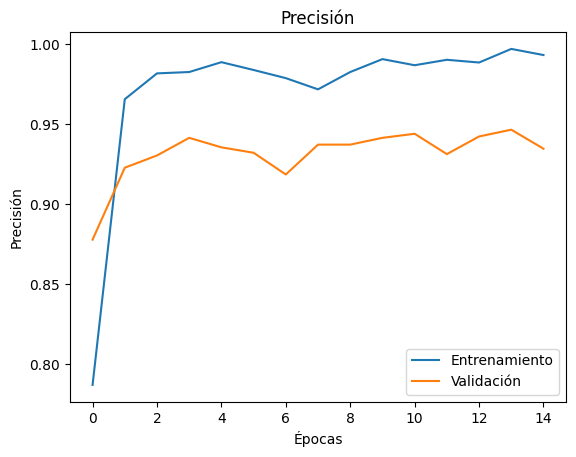

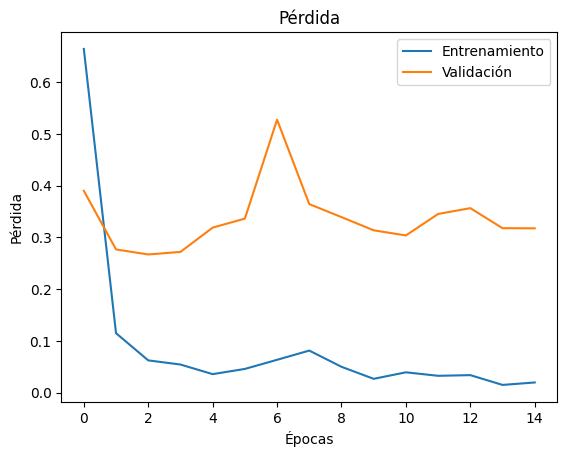

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# **🧪 Evaluar el modelo final**

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Precisión en validación: {acc*100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9106 - loss: 0.5026
Precisión en validación: 93.47%


In [ ]:
from tensorflow.keras.models import load_model

mejor_modelo = load_model('/content/mejor_modelo_vgg16_gpu.h5')

In [ ]:
import numpy as np

# Predicciones del modelo (val_generator no se baraja, por eso sirve aquí)
preds = mejor_modelo.predict(val_generator)
y_pred = (preds > 0.5).astype(int).reshape(-1)  # Convertir a 0 o 1
y_true = val_generator.classes  # Etiquetas reales

37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Paso 1: Obtener predicciones
Y_pred = mejor_modelo.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)  # → clases predichas como enteros

# Paso 2: Obtener etiquetas reales
y_true = val_generator.classes  # → etiquetas verdaderas como enteros

# Paso 3: Nombres de clases ordenados según índices
class_names = list(val_generator.class_indices.keys())

# Paso 4: Reporte y matriz de confusión
print("📊 Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("📉 Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step
📊 Reporte de clasificación:
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.98      0.82      0.89        96
           brown_spot       0.94      0.93      0.94       193
                hispa       0.94      0.96      0.95       319
               normal       0.95      0.97      0.96       353
               tungro       0.95      0.94      0.95       218

             accuracy                           0.95      1179
            macro avg       0.95      0.93      0.94      1179
         weighted avg       0.95      0.95      0.95      1179

📉 Matriz de confusión:
[[ 79   7   7   2   1]
 [  1 180   6   3   3]
 [  1   2 307   7   2]
 [  0   0   4 344   5]
 [  0   3   3   6 206]]


<ipython-input-61-1237090605>:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


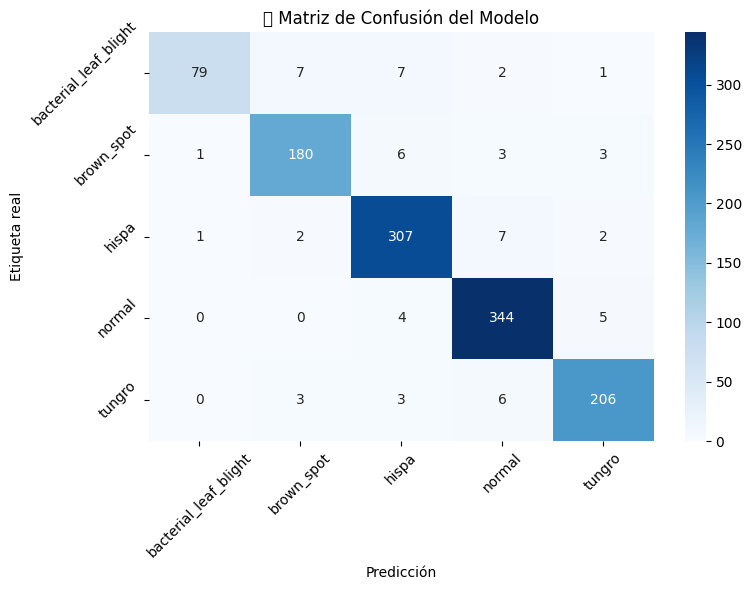

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Etiquetas de clase
labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('🔍 Matriz de Confusión del Modelo')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Ruta de la imagen
ruta_img = '/content/paddy-disease-classification/filtered_train_images/tungro/100247.jpg'

# Cargar y preprocesar
img = image.load_img(ruta_img, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Lista de tus clases (en el mismo orden en que fue entrenado el modelo)
clases = ['bacterial_leaf_blight', 'brown_spot', 'hispa', 'tungro', 'normal']

# Realizar la predicción
pred = mejor_modelo.predict(img_array)

# Índice de clase con mayor probabilidad
clase_predicha = clases[np.argmax(pred)]

# Porcentaje de confianza
confianza = np.max(pred) * 100

print(f"🔍 Predicción: {clase_predicha} ({confianza:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
🔍 Predicción: normal (93.29%)
